## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import random
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## Data Cleaning & Formatting

In [4]:
# checking for null values

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
# check whether the target value is balanced or not

df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [6]:
df.shape

(11162, 17)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


## Visualizing the Data

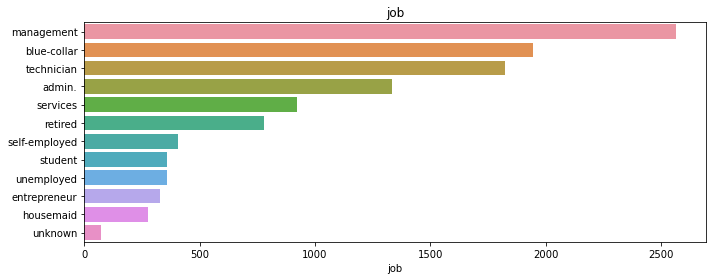

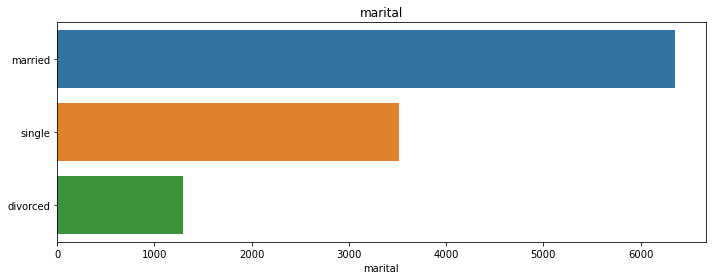

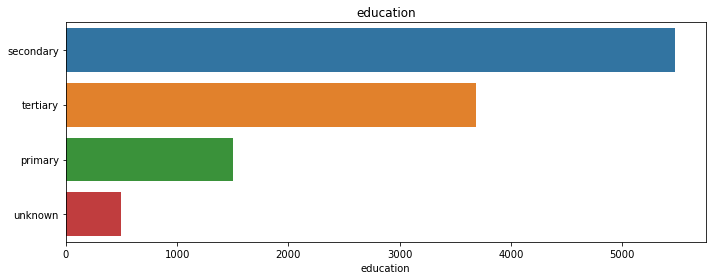

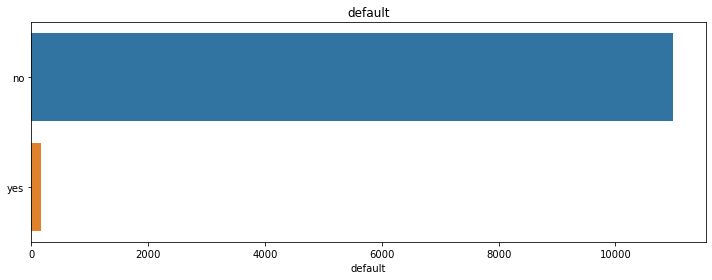

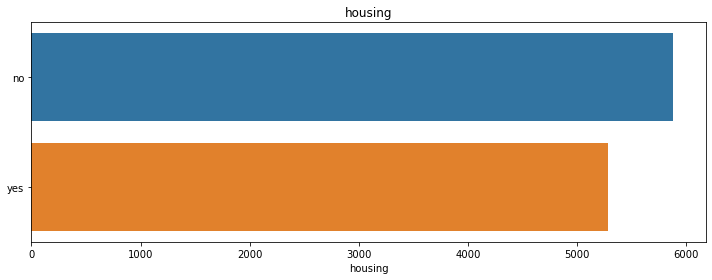

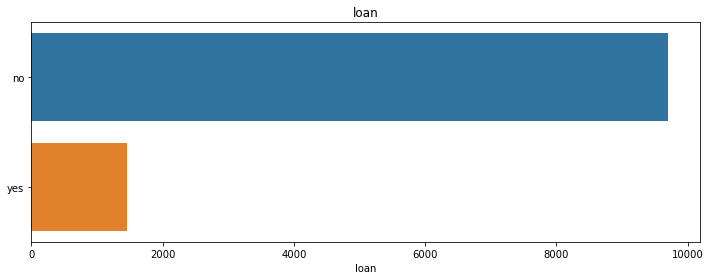

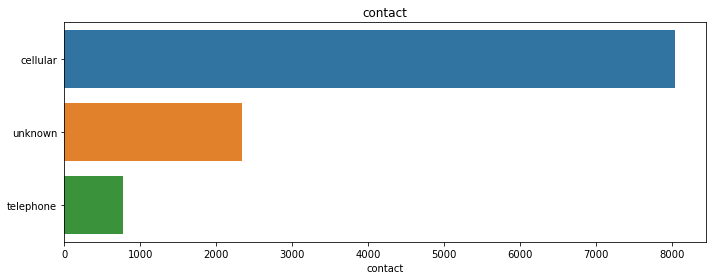

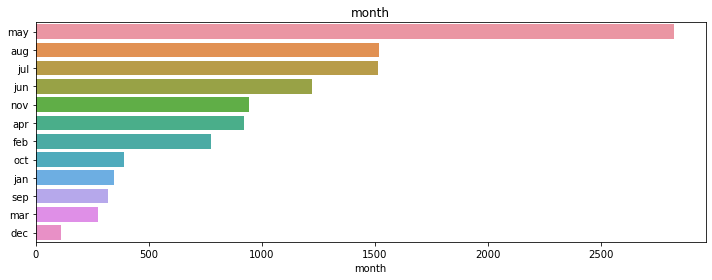

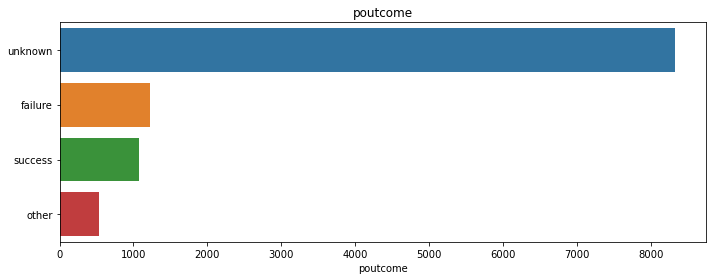

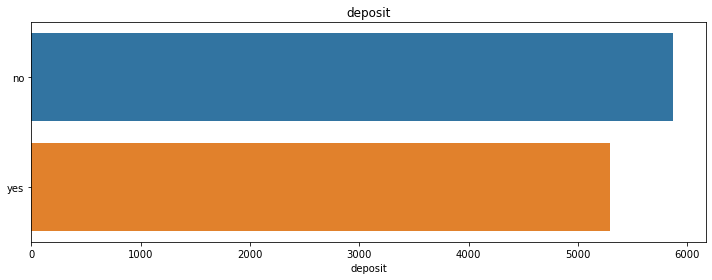

In [8]:
# plotting the categorical values in a bar chart

cat_variables = ['job', 'marital', 'education', 'default','housing', 'loan', 'contact', 'month', 'poutcome','deposit']

for col in cat_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts(), df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

In [9]:
df.groupby('deposit').mean()

,age,balance,day,duration,campaign,pdays,previous
deposit,,,,,,,
no,40.837391,1280.227141,16.108122,223.130257,2.839264,35.685340,0.528350
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


### Observation:

The average age of customers who bought the term deposit is higher than that of the customers who didn’t.

In [10]:
df.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.374063,1195.866567,15.340330,347.929535,2.376312,64.338831,0.973763
blue-collar,39.505144,1203.926440,15.235597,394.658951,2.541152,44.061214,0.633230
entrepreneur,42.887195,1621.942073,15.442073,370.182927,2.725610,32.746951,0.536585
housemaid,47.445255,1366.160584,16.364964,348.346715,2.689781,33.540146,0.503650
management,40.218239,1793.663679,15.792284,361.482073,2.588075,54.456352,0.925175
retired,65.424165,2417.250643,15.519280,389.993573,2.131105,53.003856,0.994859
self-employed,39.809877,1865.372840,15.938272,396.155556,2.533333,45.039506,0.804938
services,38.141928,1081.171181,15.728061,385.955580,2.576381,51.546046,0.684724
student,26.102778,1500.783333,15.175000,330.672222,2.169444,68.683333,1.297222


In [11]:
df.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,47.365043,1371.835267,15.689869,392.481825,2.457077,46.651199,0.664346
married,44.533617,1599.927570,15.678791,361.063769,2.621477,49.505432,0.822233
single,33.017339,1457.255259,15.608869,384.195566,2.323195,56.344798,0.913019


In [12]:
df.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,48.220667,1523.031333,15.510667,383.803333,2.646000,39.976667,0.688000
secondary,40.086012,1296.480278,15.568846,373.344960,2.470051,53.302045,0.821768
tertiary,39.513147,1845.869070,15.782597,368.627812,2.487395,53.120629,0.924370
unknown,45.523139,1746.605634,16.160966,346.448692,2.672032,50.585513,0.706237


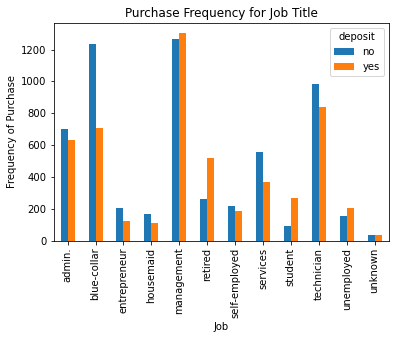

In [13]:
# Chart to show the purchase frequency of clients based on their job titles

%matplotlib inline
pd.crosstab(df.job,df.deposit).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

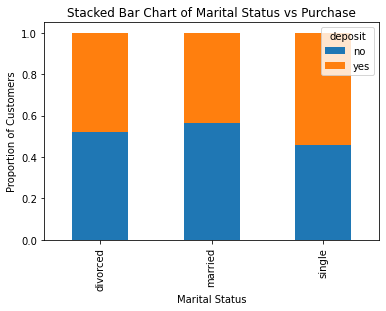

In [14]:
# Chart for Marital Status Vs. Purchase

table = pd.crosstab(df.marital, df.deposit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

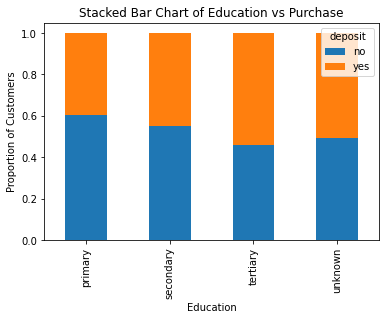

In [15]:
# Chart for Educational qualification Vs. Purchase

table=pd.crosstab(df.education,df.deposit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

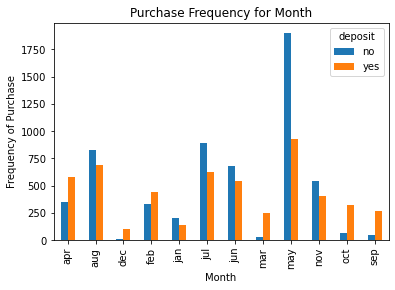

In [16]:
# Purchase frequency for each month

pd.crosstab(df.month,df.deposit).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

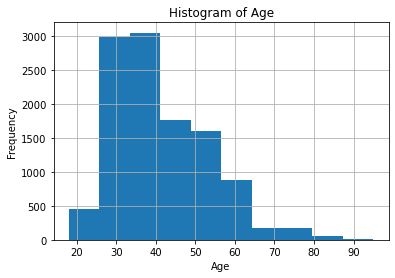

In [17]:
# Age of customers who pruchased

df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Most of the customers of the bank in this dataset are in the age range of 27–40.

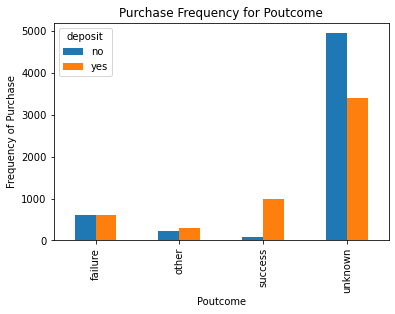

In [18]:
# Purchase frequency for Poutcome

pd.crosstab(df.poutcome,df.deposit).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

## Data Transformation - Encoding Categorical data

In [19]:
#Create dummy variables: That is variables with only two values, zero and one.

cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data = df.join(cat_list)
    df = data

In [20]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']

data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]


In [21]:
data_final=df[to_keep]
data_final.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'deposit', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [22]:
data_final_vars=data_final.columns.values.tolist()
y=['deposit']
X=[i for i in data_final_vars if i not in y]

## Correlation 

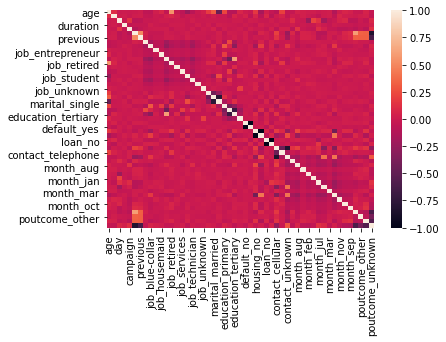

In [23]:
#Check the independence between the independent variables

sns.heatmap(data_final.corr())
plt.show()

## Feature Selection:

In [24]:
logreg = LogisticRegression()

# Recursive feature elimination
rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y])

print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
  True False False  True False False False False False False False False
 False False False False  True False False  True  True False  True False
  True  True  True  True  True False  True  True  True  True  True False
 False  True  True]
[29 34 31 30 23 33 25 17 15 11  4 12  1 13 14  1 16 32 10 22  5 20 19 28
  9 27 18 24  1  6  7  1  1  8  1 26  1  1  1  1  1 21  1  1  1  1  1  2
  3  1  1]


In [25]:
cols=["previous","job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", 
      "poutcome_failure", "poutcome_success"]
     
X=data_final[cols]
y=data_final['deposit']

In [26]:
X.head()

,previous,job_blue-collar,job_retired,job_services,job_student,default_no,month_aug,month_dec,month_jul,month_nov,month_oct,month_sep,poutcome_failure,poutcome_success
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Train and Test split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [28]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Models evaluation & Accuracy checking

### Logistic Regression

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.66


## Cross Validation

Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. I am using 10-fold Cross-Validation to train Logistic Regression model.

In [30]:
kfold = model_selection.KFold(n_splits=10)

modelCV = LogisticRegression()

results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring='accuracy')
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.648


The average accuracy remains very close to the Logistic Regression model accuracy; hence, we can conclude that our model generalizes well

In [31]:
# Confusion matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1090  115]
 [ 636  392]]


In [32]:
# Compute precision, recall, F-measure and support

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.63      0.90      0.74      1205
         yes       0.77      0.38      0.51      1028

    accuracy                           0.66      2233
   macro avg       0.70      0.64      0.63      2233
weighted avg       0.70      0.66      0.64      2233



### Interpretation: 
#### Of the entire test set, 69% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 66% of the customer’s preferred term deposits that were promoted.

## Naive Bayes

In [33]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

Text(0.5, 15.0, 'Predicted label')

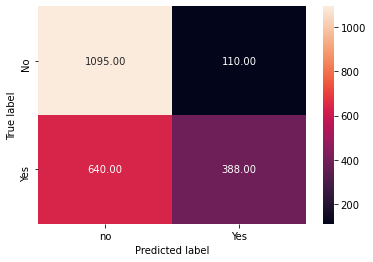

In [34]:
# Confusion Matrix
nb_prediction = nb_classifier.predict(X_test)
nb_classifier = metrics.confusion_matrix(y_test, nb_prediction)

sns.heatmap(nb_classifier, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [35]:
# Accuracy score

#nb_prediction = nb_classifier.predict(X_test)
metrics.accuracy_score(y_test, nb_prediction)

0.664128974473802

## KNN Classifer

In [36]:
tuned_parameters = [{'n_neighbors': [3,5, 7, 9,11]}]

knn_classifier = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')

In [37]:
knn_classifier.fit(X_train, y_train )

knn_classifier.best_score_

0.5968215281633371

In [38]:
# best params
knn_classifier.best_params_

{'n_neighbors': 11}

In [39]:
#Building for the n_neighbors=11
knn_clf = KNeighborsClassifier(n_neighbors = 11)

In [40]:
knn_classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 7, 9, 11]}],
             scoring='accuracy')

Text(0.5, 15.0, 'Predicted label')

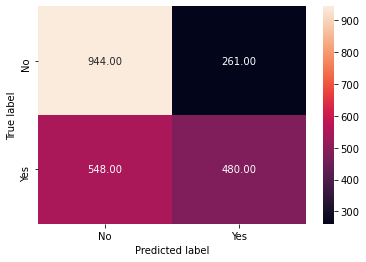

In [41]:
# Confusion matrix - KNN

knn_prediction = knn_classifier.predict(X_test) 
knn_cm = metrics.confusion_matrix(y_test, knn_prediction)

sns.heatmap(knn_cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [42]:
# Accuracy score

metrics.accuracy_score( y_test, knn_prediction)

0.6377071204657412

## SVM

In [43]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

svm_prediction = svm_classifier.predict(X_test)

# Accuracy score
accuracy_score(y_test, svm_prediction)

0.6699507389162561

## Random Forest

In [44]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

rf_prediction = rf_classifier.predict(X_test)

# Accuracy score
accuracy_score(y_test, rf_prediction)

0.6618898343036274

Compare the accuracy of all model & decide which model gives the better result?

Logistic Regression model(66%) Naive Bayes(66.4%) KNN(63.7%) SVM (66.99%) Random Forest (66.18%)

As per the accuracy of model, Logistic & SVM is more accurate in terms of prediction than others so preferably will use this model for prediction.